In [48]:
'''
surfplot_sl_reg_sqrR2.ipynb
Fig5. visualize mean sqrt(r2) of multiple regression
corrected the thresholding Oct 2024 Jane
ran on all models including pymoten motion Aug 2024 Jane

Reference: surfplot_regression_model_group.ipynb

# if the file is in niml.dset:
# run ~/social_action/scripts/post_hha/surface_io2.py
'''

'\nsurfplot_sl_reg_sqrR2.ipynb\nFig5. visualize mean sqrt(r2) of multiple regression\ncorrected the thresholding Oct 2024 Jane\nran on all models including pymoten motion Aug 2024 Jane\n\nReference: surfplot_regression_model_group.ipynb\n\n# if the file is in niml.dset:\n# run ~/social_action/scripts/post_hha/surface_io2.py\n'

In [2]:
## import environment
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
import nibabel as nib
import numpy as np
from surfplot.utils import threshold
import matplotlib.pyplot as plt

In [5]:
## debug: figure out why thresholding not working
surfaces = fetch_fsaverage(density='41k')
lh, rh = surfaces['inflated']

mask_rh = np.load('./cortical_mask_rh.npy')
mask_lh = np.load('./cortical_mask_lh.npy')

model_group = 'ts'
# surface of not unique model_group R2
sl_lh = nib.load(f'./sl_post_hha_boot_1sided_bh_reg-{model_group}_lh_r2.gii').agg_data()
sl_rh = nib.load(f'./sl_post_hha_boot_1sided_bh_reg-{model_group}_rh_r2.gii').agg_data()

# surface of not unique model_group sqrR2
#sl_lh = nib.load(f'./sl_post_hha_boot_1sided_bh_reg-{model_group}_lh_sqrR2.gii').agg_data()
#sl_rh = nib.load(f'./sl_post_hha_boot_1sided_bh_reg-{model_group}_rh_sqrR2.gii').agg_data()

print(np.max(sl_lh[2]))
print(np.max(sl_rh[2]))

print(np.sum(sl_lh[2]>0.001))
print(np.sum(sl_rh[2]>0.001))

0.08159184
0.078622565
7383
6253


In [54]:
## debug
mean_lh = sl_lh[0].copy() #use .copy()!
mean_rh = sl_rh[0].copy()

# threshold if necessary
if threshold:
    # statistical thresholding -> q_value
    mean_lh[sl_lh[2] > threshold_val] = np.nan
    mean_rh[sl_rh[2] > threshold_val] = np.nan
    # 'threshold' surfplot -> incorrect method
    #mean_lh = threshold(mean_lh, threshold_val)
    #mean_rh = threshold(mean_rh, threshold_val)
    
# Remove and clean up the medial wall
mean_lh[~mask_lh] = np.nan
mean_rh[~mask_rh] = np.nan

In [56]:
mean_rh

array([0.01351391, 0.02379243, 0.02638027, ..., 0.03259002, 0.03625745,
       0.03805179], dtype=float32)

In [87]:
def draw_sqrR2(model_group, save_f, color_range=(-.30,.30), views=None, cmap='inferno', threshold=None):
    surfaces = fetch_fsaverage(density='41k')
    lh, rh = surfaces['inflated']
    
    mask_rh = np.load('./cortical_mask_rh.npy')
    mask_lh = np.load('./cortical_mask_lh.npy')

    # surface of not unique model_group R2
    sl_lh = nib.load(f'./sl_post_hha_boot_1sided_bh_reg-{model_group}_lh_r2.gii').agg_data()
    sl_rh = nib.load(f'./sl_post_hha_boot_1sided_bh_reg-{model_group}_rh_r2.gii').agg_data()    
    
    # surface of not unique model_group sqrR2
    # load in bootstrap sqr(R2)
    #sl_lh = nib.load(f'./sl_post_hha_boot_1sided_bh_reg-{model_group}_lh_sqrR2.gii').agg_data()
    #sl_rh = nib.load(f'./sl_post_hha_boot_1sided_bh_reg-{model_group}_rh_sqrR2.gii').agg_data()
    
    # from /backup/data/social_actions/fmri/pymvpa/sl_reg_{pair}_{hemi}_mean_sqrR2.gii
    #sl_lh = nib.load(f'./sl_reg-{model_group}_lh_mean_sqrR2.gii').agg_data()
    #sl_rh = nib.load(f'./sl_reg-{model_group}_rh_mean_sqrR2.gii').agg_data()

    mean_lh = sl_lh[0].copy() #use .copy()!
    mean_rh = sl_rh[0].copy()

    # threshold if necessary
    if threshold:
        # statistical thresholding -> q_value
        mean_lh[sl_lh[2] > threshold_val] = np.nan
        mean_rh[sl_rh[2] > threshold_val] = np.nan
        # 'threshold' surfplot -> incorrect method
        #mean_lh = threshold(mean_lh, threshold_val)
        #mean_rh = threshold(mean_rh, threshold_val)
        
    # Remove and clean up the medial wall
    mean_lh[~mask_lh] = np.nan
    mean_rh[~mask_rh] = np.nan

    '''
    # sqrt for R2 boot - discarded
    mean_lh = np.sqrt(mean_lh)
    mean_rh = np.sqrt(mean_rh)
    '''
    
    p = Plot(surf_lh=lh, surf_rh=rh, views=views, brightness=0.7, zoom=1.58, size=(500,375))
    p.add_layer({'left': mean_lh, 'right': mean_rh}, cmap=cmap,
                color_range=color_range)
        
    cbar_kws = dict(location='right', draw_border=False, aspect=10,
                    shrink=.3, decimals=3, pad=0)
    fig = p.build(scale=(3,3), cbar_kws=cbar_kws)    
    
    print(f'{model_group} model rh max={np.nanmax(mean_rh)} min={np.nanmin(mean_rh)}')
    print(f'{model_group} model lh max={np.nanmax(mean_lh)} min={np.nanmin(mean_lh)}')
    
    # save fig
    plt.savefig(save_f, dpi=300, transparent=True, bbox_inches='tight')
    print(f'saved {save_f}')

ts model rh max=0.21759234368801117 min=0.00030118791619315743
ts model lh max=0.20803119242191315 min=0.0002082196733681485
saved ./plot/sl_boot_1sided_bh_reg-ts_r2_thresh0.001_lm.png


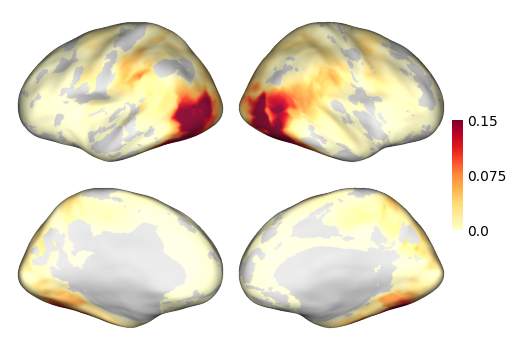

In [104]:
model_group = 'ts'
cmap = 'YlOrRd'
threshold = 0.001 #0.0005
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_lm.png'
#save_f = f'./plot/sl_1sided_bh_reg-{model_group}_sqrR2_lm.png' #bootstrap sqrR2
draw_sqrR2(model_group, save_f, color_range=(0, .15), cmap=cmap, threshold=threshold)

ts model rh max=0.21759234368801117 min=0.00030118791619315743
ts model lh max=0.20803119242191315 min=0.0002082196733681485
saved ./plot/sl_boot_1sided_bh_reg-ts_r2_thresh0.001_v.png


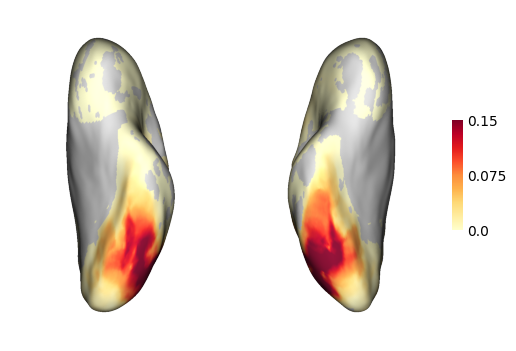

In [89]:
model_group = 'ts'
cmap = 'YlOrRd'
threshold = 0.001 #0.0005
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_v.png'
#save_f = f'./plot/sl_1sided_bh_reg-{model_group}_sqrR2_v.png' #bootstrap sqrR2
draw_sqrR2(model_group, save_f, color_range=(0, .15), views='ventral', cmap=cmap, threshold=threshold)

ts model rh max=0.21759234368801117 min=0.00030118791619315743
ts model lh max=0.20803119242191315 min=0.0002082196733681485
saved ./plot/sl_boot_1sided_bh_reg-ts_r2_thresh0.001_p.png


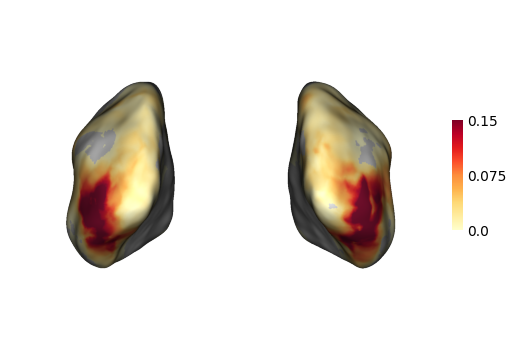

In [91]:
model_group = 'ts'
cmap = 'YlOrRd'
threshold = 0.001 #0.0005
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_p.png'
#save_f = f'./plot/sl_1sided_bh_reg-{model_group}_sqrR2_p.png'
draw_sqrR2(model_group, save_f, color_range=(0, .15), cmap=cmap, views='posterior', threshold=threshold)

ops model rh max=0.11756086349487305 min=0.00042588356882333755
ops model lh max=0.11542794853448868 min=0.00038407754618674517
saved ./plot/sl_boot_1sided_bh_reg-ops_r2_thresh0.001_lm.png


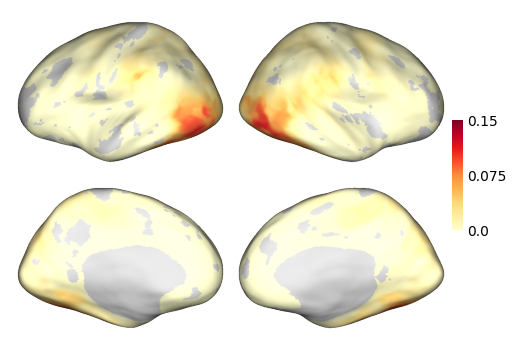

In [92]:
model_group = 'ops'
cmap = 'YlOrRd'
threshold = 0.001 #0.0005
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_lm.png'
#save_f = f'./plot/sl_1sided_bh_reg-{model_group}_sqrR2_lm.png'
draw_sqrR2(model_group, save_f, color_range=(0, .15), cmap=cmap, threshold=threshold)

ops model rh max=0.11756086349487305 min=0.00042588356882333755
ops model lh max=0.11542794853448868 min=0.00038407754618674517
saved ./plot/sl_boot_1sided_bh_reg-ops_r2_thresh0.001_v.png


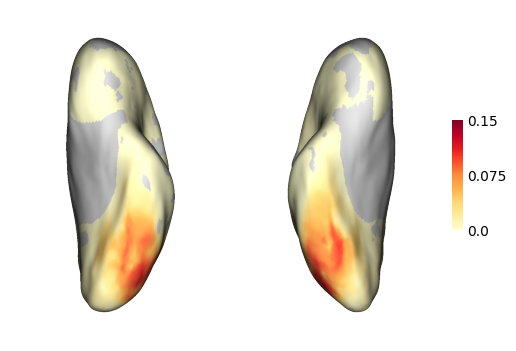

In [94]:
model_group = 'ops'
threshold_val= 0.001
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_v.png'
#save_f = f'./plot/sl_1sided_bh_reg-{model_group}_sqrR2_v.png'
draw_sqrR2(model_group, save_f, color_range=(0, .15), views='ventral', cmap=cmap, threshold=threshold)

ops model rh max=0.11756086349487305 min=0.00042588356882333755
ops model lh max=0.11542794853448868 min=0.00038407754618674517
saved ./plot/sl_boot_1sided_bh_reg-ops_r2_thresh0.001_p.png


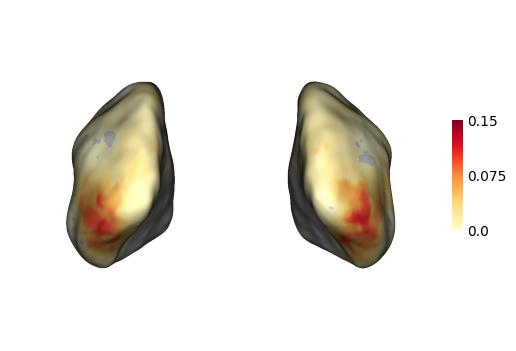

In [95]:
threshold_val = 0.001 #0.0005
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_p.png'
draw_sqrR2(model_group, save_f, color_range=(0, .15), views='posterior', cmap=cmap, threshold=threshold)

vn model rh max=0.06805770099163055 min=0.00015275838086381555
vn model lh max=0.06459973752498627 min=0.00014818647468928248
saved ./plot/sl_boot_1sided_bh_reg-vn_r2_thresh0.001_lm.png


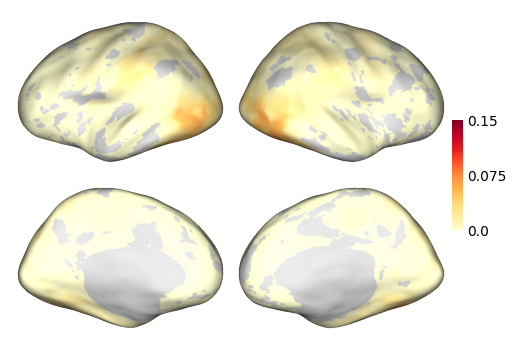

In [96]:
model_group = 'vn'
threshold_val = 0.001
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_lm.png'
#save_f = f'./plot/sl_1sided_bh_reg-{model_group}_sqrR2_lm.png'
draw_sqrR2(model_group, save_f, color_range=(0, .15), cmap=cmap, threshold=threshold)

vn model rh max=0.06805770099163055 min=0.00015275838086381555
vn model lh max=0.06459973752498627 min=0.00014818647468928248
saved ./plot/sl_boot_1sided_bh_reg-vn_r2_thresh0.001_v.png


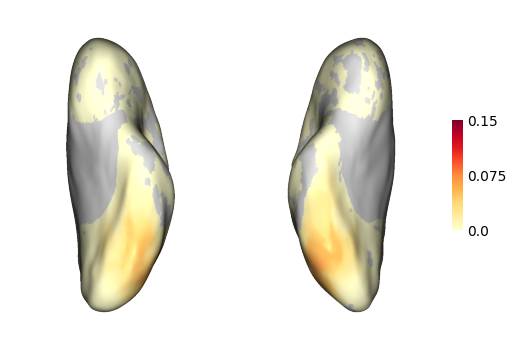

In [99]:
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_v.png'
#save_f = f'./plot/sl_1sided_bh_reg-{model_group}_sqrR2_v.png'
draw_sqrR2(model_group, save_f, views='ventral', cmap=cmap, color_range=(0, .15), threshold=threshold)

vn model rh max=0.06805770099163055 min=0.00015275838086381555
vn model lh max=0.06459973752498627 min=0.00014818647468928248
saved ./plot/sl_boot_1sided_bh_reg-vn_r2_thresh0.001_p.png


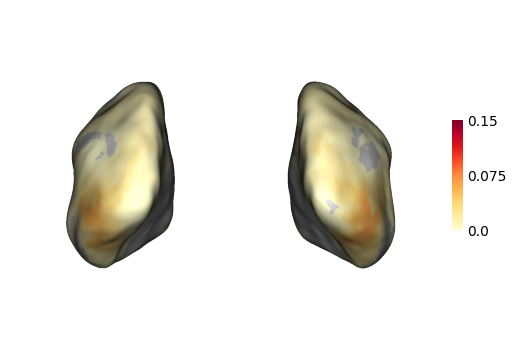

In [102]:
save_f = f'./plot/sl_boot_1sided_bh_reg-{model_group}_r2_thresh{threshold}_p.png'
#save_f = f'./plot/sl_1sided_bh_reg-{model_group}_sqrR2_p.png'
draw_sqrR2(model_group, save_f, threshold=threshold, cmap=cmap, views='posterior', color_range=(0, .15))